# Import library

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
test=pd.read_csv('/kaggle/input/competitions/titanic/test.csv')
train=pd.read_csv('/kaggle/input/competitions/titanic/train.csv')

In [63]:
print(test.shape)
print(train.shape)

(418, 11)
(891, 12)


# 🔹 Step 1: Understand the Dataset

The Titanic dataset contains features like:

Features Overview
| **Feature** | **Description** |
|-------------|-----------------|
| **Survived** | Target variable (0 = No, 1 = Yes) |
| **Pclass**   | Ticket class (1st, 2nd, 3rd) |
| **Sex**      | Passenger gender (Male/Female) |
| **Age**      | Passenger age in years |
| **Fare**     | Ticket price |
| **SibSp**    | Number of siblings/spouses aboard |
| **Parch**    | Number of parents/children aboard |
| **Embarked** | Port of boarding (C = Cherbourg, Q = Queenstown, S = Southampton) |


Our Target Variable = Survived

In [64]:
train.head(2) 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


# 🔹 Step 2: Data Cleaning & Preprocessing
     ### Handle with missing values
       1. check missing values in columns
       2. check null values in columns

   note:
        age ,cabin and embark has missing value or null values
        
      ### How to handle with missing value?
        - if column is number : fill by men,median value  
        - if text=> fill by most frequent value
        - if many rows are missing then drop this column


In [65]:
train.info()   # it explain how many column in dataset + how many missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Drop cabin

In [66]:
# Drop cabin
train.drop(columns=['Cabin'],inplace=True) # inplace used for permenet operation
test.drop(columns=['Cabin'],inplace=True)

In [67]:
# if you want to see how many null records are in colums 
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [68]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [69]:
train['Embarked'].value_counts()     # check most frequest value

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [70]:
train['Embarked'].fillna('S',inplace=True)

/tmp/ipykernel_55/535005595.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Embarked'].fillna('S',inplace=True)


In [71]:
test['Fare'].fillna(test['Fare'].mean(),inplace=True)

/tmp/ipykernel_55/3411113445.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Fare'].fillna(test['Fare'].mean(),inplace=True)


In [72]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
dtype: int64

In [73]:
# We can not delete the age 177/891 if we have large data we lost the 20 % data 
#(lower,upper.how many values)
train_age=np.random.randint(train['Age'].mean()-train['Age'].std(), train['Age'].mean()+train['Age'].std() , 177)

In [80]:
test_age=np.random.randint(test['Age'].mean()-test['Age'].std(), test['Age'].mean()+test['Age'].std() , 86)

In [81]:
train['Age'][train['Age'].isnull()]=train_age

/tmp/ipykernel_55/4268069075.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  train['Age'][train['Age'].isnull()]=train_age
/tmp/ipykernel_55/4268069075.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

In [82]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [83]:
test['Age'][test['Age'].isnull()]=test_age

/tmp/ipykernel_55/3484201817.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  test['Age'][test['Age'].isnull()]=test_age
/tmp/ipykernel_55/3484201817.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [84]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# EDA Exploitry data Analysis  
 check the value of every column whoes effect are directly on the survival or not?
 

In [85]:
# check p class directly depend on  survival
train[train['Pclass']==3]['Survived'].value_counts()  # class 3 there are lage number of deaths 

Survived
0    372
1    119
Name: count, dtype: int64

In [86]:
train.groupby(['Pclass'])['Survived'].mean() # survival changs are decrese from 1 to 3

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

probablity of canes of death?
p(death)=199/(372+119

** Conclusion :P class is the column which we can not deleted**

 # for GENDER COLUMNS

In [87]:
train['Sex'].value_counts()


Sex
male      577
female    314
Name: count, dtype: int64

In [88]:
train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [89]:
train[train['Sex']=='male']['Survived'].value_counts()

Survived
0    468
1    109
Name: count, dtype: int64

In [90]:
train.groupby(['Sex'])['Survived'].mean() #(74 servive,non sevive)

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

# check Embarked       

In [91]:
train.groupby(['Embarked'])['Survived'].mean() #(bacnhne ka change 55 percent ziyada) embark is important

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

/tmp/ipykernel_55/1463015962.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'])


<Axes: xlabel='Age', ylabel='Density'>

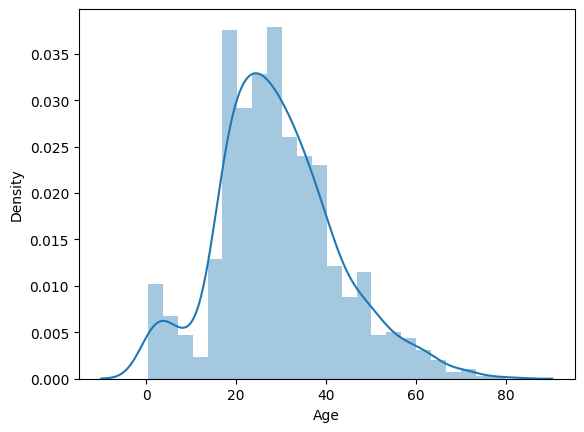

In [92]:
sns.distplot(train['Age'])

/tmp/ipykernel_55/1136725597.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'][train['Survived']==0]) # death
/tmp/ipykernel_55/1136725597.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'][train['Survived']==1]) # survive


<Axes: xlabel='Age', ylabel='Density'>

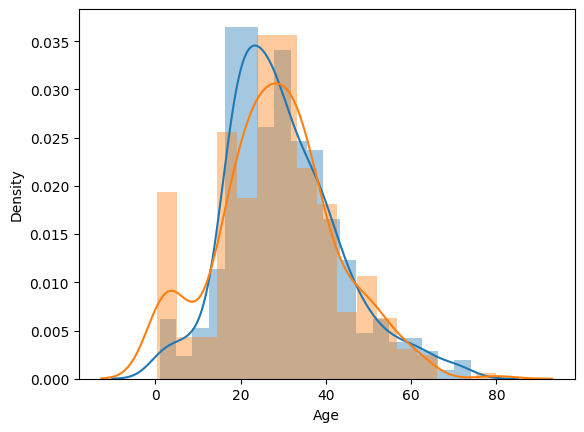

In [93]:
sns.distplot(train['Age'][train['Survived']==0]) # death
sns.distplot(train['Age'][train['Survived']==1]) # survive

# fear

/tmp/ipykernel_55/1115544690.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Fare'][train['Survived']==0]) # death
/tmp/ipykernel_55/1115544690.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Fare'][train['Survived']==1]) # survive


<Axes: xlabel='Fare', ylabel='Density'>

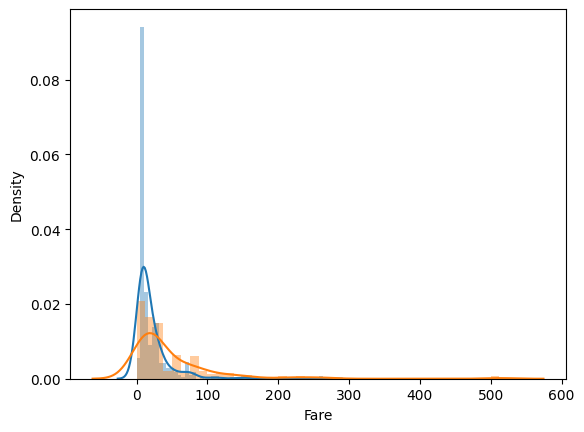

In [94]:
sns.distplot(train['Fare'][train['Survived']==0]) # death
sns.distplot(train['Fare'][train['Survived']==1]) # survive

In [96]:
# drop ticket
train.drop(columns=['Ticket'],inplace=True)
test.drop(columns=['Ticket'],inplace=True)

KeyError: "['Ticket'] not found in axis"

In [97]:
# drop name colums
train.drop(columns=['Name'],inplace=True)
test.drop(columns=['Name'],inplace=True)

In [98]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [99]:
train['family'] = train['SibSp'] + train['Parch'] + 1
test['family'] = test['SibSp'] + test['Parch'] + 1

In [100]:
train['family'].value_counts()

family
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64

In [101]:
train.groupby(['family'])['Survived'].mean()

family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

In [ ]:
def cal( number):
    if number==1:
        return "Alone"
    elif number>1  and number <5:
        return "Medium"
    else:
        return "Large"

In [102]:
train['family_Size']=train['family'].apply(cal)
test['family_Size']=test['family'].apply(cal)

In [103]:
train.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family,family_Size
0,1,0,3,male,22.0,1,0,7.2500,S,2,Medium
1,2,1,1,female,38.0,1,0,71.2833,C,2,Medium


In [104]:

train.drop(columns=['Parch','SibSp','family'],inplace=True)
test.drop(columns=['Parch','SibSp','family'],inplace=True)


In [105]:
test.head(2)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,family_Size
0,892,3,male,34.5,7.8292,Q,Alone
1,893,3,female,47.0,7.0000,S,Medium


In [106]:
print(train.shape)
print(test.shape)

(891, 8)
(418, 7)


In [110]:
passangerId=test['PassengerId'].values

In [111]:
test.drop(columns=['PassengerId'],inplace=True)
train.drop(columns=['PassengerId'],inplace=True)

In [112]:
train.head(2)

,Survived,Pclass,Sex,Age,Fare,Embarked,family_Size
0,0,3,male,22.0,7.2500,S,Medium
1,1,1,female,38.0,71.2833,C,Medium


# 2️⃣ Convert Categorical Data to Numerical
**Machine learning models cannot understand text data**.

* Sex → Male=0, Female=1

* Embarked → One-hot encoding (4 catagory 4 columns)

* 🔹 What pd.get_dummies() Does

get_dummies() converts categorical (text or discrete) columns into numerical columns using a technique called:

**👉 One-Hot Encoding**

*Machine learning models cannot understand text like:*

* "male* "
* "female"
* "S", "C", "Q"
* "1st class", "2nd class"

So we convert them into numeric format.

In [121]:
train.shape

(891, 10)

In [123]:
train=pd.get_dummies(train , columns=['Sex','Pclass','Embarked','family_Size'],drop_first=True)

KeyError: "None of [Index(['Sex', 'Pclass', 'Embarked', 'family_Size'], dtype='object')] are in the [columns]"

In [118]:
test=pd.get_dummies(test , columns=['Sex','Pclass','Embarked','family_Size'],drop_first=True)

KeyError: "None of [Index(['Sex', 'Pclass', 'Embarked', 'family_Size'], dtype='object')] are in the [columns]"

In [124]:
# test = test.astype(int)
test.head(2)

,Age,Fare,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,family_Size_Large,family_Size_Medium
0,34,7,1,0,1,1,0,0,0
1,47,7,0,0,1,0,1,0,1


In [126]:
# train = train.astype(int)
train.head(2)

,Survived,Age,Fare,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,family_Size_Large,family_Size_Medium
0,0,22,7,1,0,1,0,1,0,1
1,1,38,71,0,0,0,0,0,0,1


train 
🔹 What is iloc?

iloc means:

* Integer location based indexing

* It selects rows and columns using their position number, not column names.


In [130]:
X=train.iloc[:,1:].values
y=train.iloc[:,0].values

In [146]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
    


In [147]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

# check overfitting
print("Training:", model.score(X_train, y_train))
print("Testing:", model.score(X_test, y_test))

Training: 0.9325842696629213
Testing: 0.9217877094972067


In [138]:
model.predict(X_test[:5])

array([0, 1, 1, 1, 0])

# Accuracy 

In [148]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9217877094972067


In [140]:
import joblib

joblib.dump(model, "titanic_model.pkl")

['titanic_model.pkl']

In [167]:
from sklearn.metrics import confusion_matrix ,accuracy_score, classification_report

print("Classification Report\n",classification_report(y_test,y_pred))

print("confusion_matrix\n\n",confusion_matrix(y_test,y_pred))

print("Normalize confusion_matrix\n\n",confusion_matrix(y_test,y_pred,normalize="true"))



Classification Report
               precision    recall  f1-score   support

           0       0.92      0.95      0.94       107
           1       0.93      0.88      0.90        72

    accuracy                           0.92       179
   macro avg       0.92      0.91      0.92       179
weighted avg       0.92      0.92      0.92       179

confusion_matrix

 [[102   5]
 [  9  63]]
Normalize confusion_matrix

 [[0.95327103 0.04672897]
 [0.125      0.875     ]]


In [168]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5)
print("CV Accuracy:", cv_scores.mean())

CV Accuracy: 0.7711505869060323
